# Pandas: Python Data Analysis Library

Pandas is a toolkit built around the 'tables' package to help manipulate, read, write, and analyze large datasets

In [159]:
%matplotlib inline
import pandas as pd
import numpy as np

from pylab import *

## The Series Structure

Series is meant to help organize time or other stream data, and can handle both regularly and irregularly sampled data. A nice feature people use is its built-in support for timestamps, which can be read in and used directly from a datafile without the need to translate. Here's an example of a time-dependent trend with lots of noise added

count    1000.000000
mean       -0.012354
std         1.225649
min        -3.697130
25%        -0.876062
50%        -0.029103
75%         0.830639
max         4.748115
dtype: float64


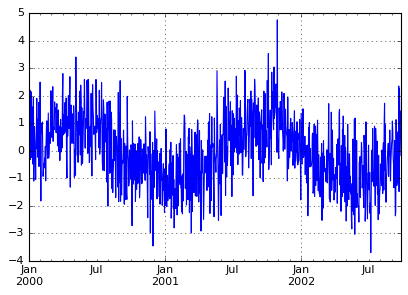

In [160]:
s = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*2*pi), index=pd.date_range('1/1/2000', periods=1000))
s.plot()
print s.describe()

We can use the series object to do quick time-domain analyses, similar to what we can do with matplotlib but handled internally and self-consistently. The windowing (rolling) function are particularly useful.

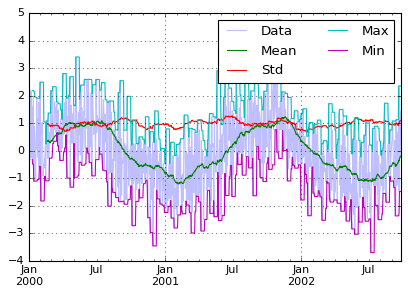

In [161]:
s.plot(alpha=0.25,label='Data')
r=pd.rolling_mean(s,50)
v=pd.rolling_std(s,50)
ma=pd.rolling_max(s,10)
mi=pd.rolling_min(s,10)
r.plot(label='Mean')
v.plot(label='Std')
ma.plot(label='Max')
mi.plot(label='Min')
legend(ncol=2)
show()

Indexing and restricting the range can also be handled easily for a series, the same way one would do it for a numpy array

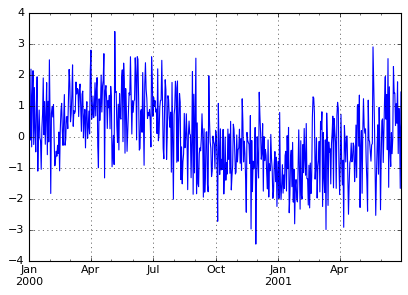

1.12271019639 -1.89788357288 -1.85975569968


In [162]:
sy=s['2000-01':'2001-06']
sy.plot()
show()

print sy[0],sy[400],sy['2001-04-01']

### Irregular Sampling

Here's an example of scatter points to which we can add. We have 6 points originally, and add two more, then sort the index so that they're plotted sequentially.

Note that for a series object, no two points can have the same index; if you want true scatter data, we'll have to use a different structure that we'll see shortly.

Int64Index([0, 10, 11, 12, 42, 60], dtype='int64')
Int64Index([0, 10, 11, 12, 42, 60, 1, -5], dtype='int64')
Int64Index([-5, 0, 1, 10, 11, 12, 42, 60], dtype='int64')
-5     20
 0      1
 1      0
 10     2
 11     3
 12     4
 42     5
 60     6
dtype: int64


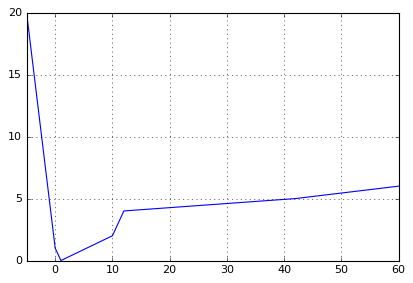

In [163]:
sIrr = pd.Series([1,2,3,4,5,6],index=[0,10,11,12,42,60])
print sIrr.index

sIrr[1]=0
sIrr[-5]=20
print sIrr.index

sIrrSorted=sIrr.sort_index()
print sIrrSorted.index
print sIrrSorted

sIrrSorted.plot()
show()

## The DataFrame Structure

What if we have multiple time-series data? How about an array with simple indices, where maybe we have uncorrelated x and y values? We need a dataframe, which is analogous to a numpy recarray.

In this example, I have two series objects with different underlying signals that I call 'A' and 'B'.

In [164]:
sA = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*0.5*2*pi), index=pd.date_range('1/1/2010', periods=1000))
sB = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*100*2*pi), index=pd.date_range('1/1/2010', periods=1000))

d = pd.DataFrame({'A':sA,'B':sB})
d.head()

,A,B
2010-01-01,0.134972,0.304914
2010-01-02,1.039996,1.003217
2010-01-03,0.036743,0.875688
2010-01-04,0.333590,-0.051680
2010-01-05,0.397054,-2.271781


Note that the index here is the same as the index for the Series objects. They happened to be the same; we'll see shortly what happens when they're not the same. Below, we can index normally, and we see one way to access a column. We can also use dataframes to plot without resorting to for loops!

                   A         B
2010-01-09  0.086060 -0.457826
2010-01-10  1.314195 -0.502240
0.0860598385947


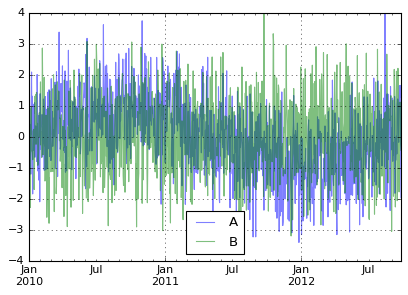

In [165]:
print d['20100109':'20100110']
print d.A['20100109']

d.plot(alpha=0.5)
show()

Suppose we have data from two different instruments with different time ranges. One gives us just A and B, and one includes an additional failsage flag. This new dataframe might look like the following

In [166]:
sANew = pd.Series(np.random.randn(3000)+np.sin(np.arange(0,6,2e-3)*0.5*2*pi), index=pd.date_range('1/1/2015', periods=3000))
sBNew = pd.Series(np.random.randn(3000)+np.sin(np.arange(0,6,2e-3)*50*2*pi), index=pd.date_range('1/1/2015', periods=3000))
sCNew = pd.Series(np.random.randn(3000) > 0.5, index=pd.date_range('1/1/2015', periods=3000))

dNew = pd.DataFrame({'A':sANew,'B':sBNew,'C':sCNew})

dNew.head()

,A,B,C
2015-01-01,0.167241,0.093903,False
2015-01-02,-0.071146,0.627356,False
2015-01-03,-1.625656,-0.608208,False
2015-01-04,0.614036,2.520661,False
2015-01-05,1.716860,0.796847,False


Here we concatenate the new dataframes to make a new dataframe object; we see we have a new column with 'NaN' where C didn't previously exist. This also retained the original timestamps!

In [167]:
dTot=pd.concat([d,dNew])
dTot.head()

,A,B,C
2010-01-01,0.134972,0.304914,NaN
2010-01-02,1.039996,1.003217,NaN
2010-01-03,0.036743,0.875688,NaN
2010-01-04,0.333590,-0.051680,NaN
2010-01-05,0.397054,-2.271781,NaN


We can use the 'dropna' function to get back only the rows or columns without the nans. Here we do it for the rows, next we do it for the columns (to get rid of C, which is redundant). We also see that we can get the trues and falses individually using the groupby command

In [168]:
dValid=dTot.dropna(axis=0)
g=dValid.groupby('C')
print len(dTot),len(dValid),len(g.get_group(1)),len(g.get_group(0))
dValid.head()

4000 3000 920 2080


,A,B,C
2015-01-01,0.167241,0.093903,False
2015-01-02,-0.071146,0.627356,False
2015-01-03,-1.625656,-0.608208,False
2015-01-04,0.614036,2.520661,False
2015-01-05,1.716860,0.796847,False


In [169]:
dClean=dTot.dropna(axis=1)
dClean.head()

,A,B
2010-01-01,0.134972,0.304914
2010-01-02,1.039996,1.003217
2010-01-03,0.036743,0.875688
2010-01-04,0.333590,-0.051680
2010-01-05,0.397054,-2.271781


If we don't drop columns with Nan, the dataframe will just ignore those columns when it needs values for all rows (e.g for plotting). Here is an example of a scatter plot, where you can see the time gap.

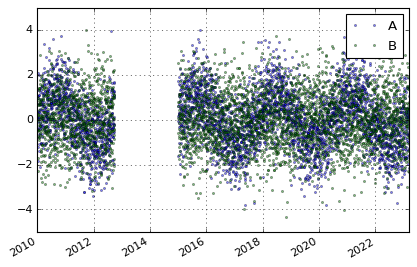

In [170]:
dTot.plot(marker='o',linestyle='',markersize=2,alpha=0.5)
show()

### Using Dataframes to Construct New Variables

Here I'm going to make some fake data (it looks like some delta pulses in time-stream data) which might be gamma ray signals or dark matter events. The backgrounds are not coincident between these two channels, for whatever reason, and the foreground is mono-energetic and shared equally between channels. I will end up with a dataframe containing 1000 traces, readout for both A and B, and the truth information about whether the event is a good event or pileup.

In [171]:
#create fake data
def signal(x,tau1,tau2,x0=500):
    dx=x-x0
    y=exp(-dx/tau1)/tau1-exp(-dx/tau2)/tau2
    y[dx<0]=0.0
    return y
 
def noisySignal(x,tau1,tau2,rms,x0=500):
    noise=np.random.normal(size=len(x),scale=rms)
    return signal(x,tau1,tau2,x0=x0)*2.0+noise
 
def noisyPileup(x,tau1,tau2,rms,nEvents,bad=False):
   
    noise=np.random.normal(size=len(x),scale=rms)
    x0=np.random.rand()*max(x)
    sig=signal(x,tau1,tau2,x0=x0)
   
    for i in range (1,nEvents):
        if(bad):
            x0+=50
        else:
            x0=np.random.rand()*max(x)
        amp=np.random.rand()*10
        sig+=signal(x,tau1,tau2,x0=x0)*amp
       
    sig+=noise
 
    return sig

cA=list()
cB=list()
truth=list()

x=np.arange(0,2000)

for i in range(0,1000):
    
    bad=np.random.rand()>0.1

    if(bad):
        chanA=np.random.rand()>0.5
        nEvents=(6-np.ceil(5*np.sqrt(np.random.uniform()))).astype(np.int)
        
        pileup=noisyPileup(x,1000,10,0.01,nEvents)
        noise=np.random.normal(size=len(x),scale=0.01)
        
        if(chanA):
            cA.append(pd.Series(pileup,index=x))
            cB.append(pd.Series(noise,index=x))
        else:
            cA.append(pd.Series(noise,index=x))
            cB.append(pd.Series(pileup,index=x))
    else:
        cA.append(pd.Series(noisySignal(x,1000,10,0.01),index=x))
        cB.append(pd.Series(noisySignal(x,1000,10,0.01),index=x))
    truth.append(not bad)
    
data=pd.DataFrame({'A':cA,'B':cB,'GoodEvent':truth})
data.head()

,A,B,GoodEvent
0,0 -0.009177 1 -0.004386 2 0.00...,0 -0.001554 1 -0.001019 2 -0.00...,False
1,0 0.011743 1 0.005532 2 0.00...,0 -0.002912 1 -0.009088 2 0.00...,False
2,0 0.004084 1 -0.012367 2 -0.00...,0 0.025603 1 0.010428 2 0.00...,False
3,0 0.000664 1 0.004565 2 0.00...,0 0.018826 1 0.010110 2 0.00...,False
4,0 0.009705 1 0.001907 2 -0.01...,0 0.009198 1 -0.014618 2 -0.00...,False


Here I'm plotting a selection of single events in one channel; these are random, so I have no idea whether they are good or not. 

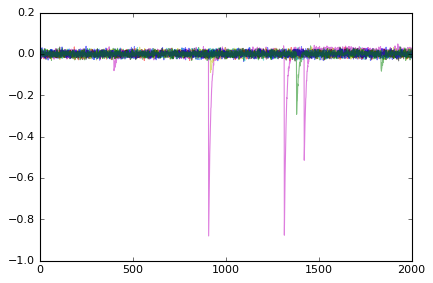

In [172]:
data['A'][0:9].apply(plot,alpha=0.5)
show()

I can also plot a single event for both channels equally easily

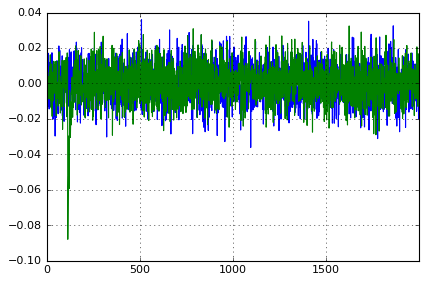

In [173]:
data['A'][0].plot()
data['B'][0].plot()

Here I use the 'goodEvent' variable to select good versus bad events

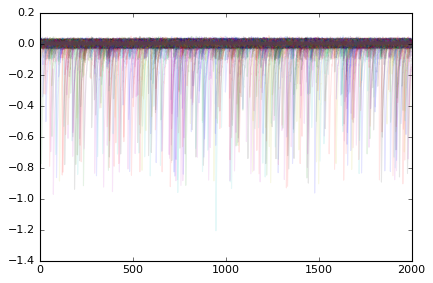

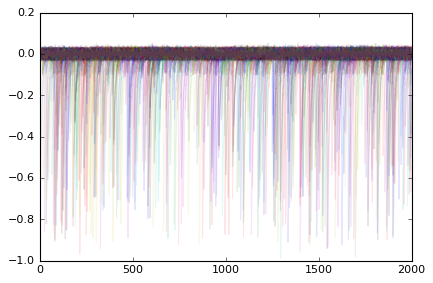

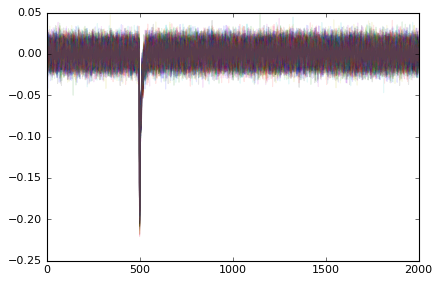

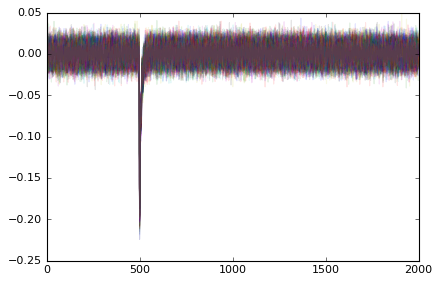

In [174]:
data.head()

g=data.groupby('GoodEvent')
for i in range(0,len(g)):
    for col in ['A','B']:
        g.get_group(i)[col].apply(plot,alpha=0.1)
        show()

,A,B,GoodEvent,Max_A,Min_A,Range_A,Max_B,Min_B,Range_B
0,0 -0.009177 1 -0.004386 2 0.00...,0 -0.001554 1 -0.001019 2 -0.00...,False,0.035945,-0.036154,0.072099,0.032443,-0.088010,0.120453
1,0 0.011743 1 0.005532 2 0.00...,0 -0.002912 1 -0.009088 2 0.00...,False,0.038574,-0.031605,0.070179,0.035848,-0.093520,0.129368
2,0 0.004084 1 -0.012367 2 -0.00...,0 0.025603 1 0.010428 2 0.00...,False,0.033718,-0.032148,0.065865,0.048784,-0.921533,0.970318
3,0 0.000664 1 0.004565 2 0.00...,0 0.018826 1 0.010110 2 0.00...,False,0.033139,-0.033860,0.066999,0.030407,-0.092709,0.123116
4,0 0.009705 1 0.001907 2 -0.01...,0 0.009198 1 -0.014618 2 -0.00...,False,0.048172,-0.880915,0.929086,0.034299,-0.032646,0.066946


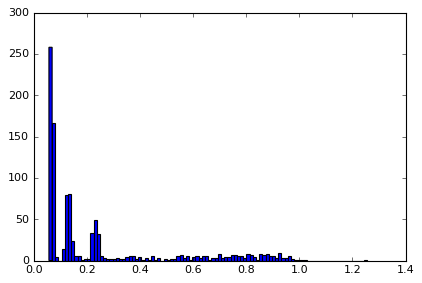

In [175]:
for chan in ['A','B']:
    data['Max_'+chan]=data[chan].map(np.max)
    data['Min_'+chan]=data[chan].map(np.min)
    data['Range_'+chan]=data['Max_'+chan]-data['Min_'+chan]

hist(data['Range_A'],bins=100)

data.head()

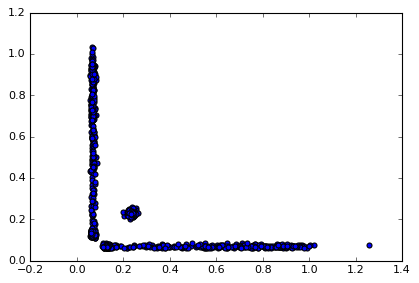

In [176]:
scatter(data['Range_A'],data['Range_B'])

,A,B,GoodEvent,Max_A,Min_A,Range_A,Max_B,Min_B,Range_B
14,0 0.010952 1 -0.007070 2 0.00...,0 -0.002376 1 -0.000543 2 0.00...,True,0.032649,-0.191595,0.224245,0.032658,-0.186825,0.219483
16,0 -0.014845 1 0.002399 2 -0.00...,0 -0.002669 1 0.000917 2 0.00...,True,0.028267,-0.200789,0.229056,0.032179,-0.166564,0.198743
26,0 0.004760 1 -0.008840 2 -0.00...,0 0.009727 1 0.008440 2 -0.00...,True,0.036066,-0.205495,0.241561,0.038446,-0.200519,0.238965
29,0 -0.006055 1 -0.007946 2 0.00...,0 -0.016862 1 -0.004460 2 -0.00...,True,0.037912,-0.188595,0.226507,0.032298,-0.184580,0.216878
30,0 -0.002534 1 0.014632 2 -0.00...,0 0.017552 1 -0.011786 2 -0.01...,True,0.031257,-0.193784,0.225041,0.031812,-0.189407,0.221219


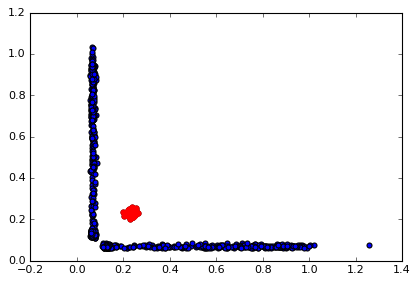

In [177]:
dataGood=data[(data['Range_A']>0.1) & (data['Range_B']>0.1)]

scatter(data['Range_A'],data['Range_B'])
scatter(dataGood['Range_A'],dataGood['Range_B'],color='red')

dataGood.head()

## MultiIndex

The above example is great, but having to combine strings and remember the naming scheme is a pain and not very good practice. Multiindices (indexing by pairs or tuples) solve this problem. Note that the Panel class was mean to do this, but that is now deprecated in favor or multiindex

For example, we can build an array with a multi-index to include column categories with variables grouped by channel

In [178]:
data=pd.DataFrame({('A','trace'):cA,('B','trace'):cB,('Event','GoodEvent'):truth})
for chan in ['A','B']:
    data[chan,'Max']=data[chan]['trace'].map(np.max)
    data[chan,'Min']=data[chan]['trace'].map(np.min)
    data[chan,'Range']=data[chan,'Max']-data[chan,'Min']

data.head()

A  \
                                               trace   
0  0      -0.009177
1      -0.004386
2       0.00...   
1  0       0.011743
1       0.005532
2       0.00...   
2  0       0.004084
1      -0.012367
2      -0.00...   
3  0       0.000664
1       0.004565
2       0.00...   
4  0       0.009705
1       0.001907
2      -0.01...   

                                                   B     Event         A  \
                                               trace GoodEvent       Max   
0  0      -0.001554
1      -0.001019
2      -0.00...     False  0.035945   
1  0      -0.002912
1      -0.009088
2       0.00...     False  0.038574   
2  0       0.025603
1       0.010428
2       0.00...     False  0.033718   
3  0       0.018826
1       0.010110
2       0.00...     False  0.033139   
4  0       0.009198
1      -0.014618
2      -0.00...     False  0.048172   

                              B                      
        Min     Range       Max       Min     Range  
0 -0.036154  0.072099  0.032443 -0.088010  0.120453  
1 -0.031605  0.070179  0.035848 -0.093520  0.129368  
2 -0.032148  0.065865  0.048784 -0.921533  0.970318  
3 -0.033860  0.066999  0.030407 -0.092709  0.123116  
4 -0.880915  0.929086  0.034299 -0.032646  0.066946

This is great, but now the multi-index is disorganized. We can easily organize any index (on any level) using the sortindex and sortlevel functions

In [179]:
data=data.sortlevel(axis=1)
data.head()

A                      \
                                               trace       Max       Min   
0  0      -0.009177
1      -0.004386
2       0.00...  0.035945 -0.036154   
1  0       0.011743
1       0.005532
2       0.00...  0.038574 -0.031605   
2  0       0.004084
1      -0.012367
2      -0.00...  0.033718 -0.032148   
3  0       0.000664
1       0.004565
2       0.00...  0.033139 -0.033860   
4  0       0.009705
1       0.001907
2      -0.01...  0.048172 -0.880915   

                                                             B            \
      Range                                              trace       Max   
0  0.072099  0      -0.001554
1      -0.001019
2      -0.00...  0.032443   
1  0.070179  0      -0.002912
1      -0.009088
2       0.00...  0.035848   
2  0.065865  0       0.025603
1       0.010428
2       0.00...  0.048784   
3  0.066999  0       0.018826
1       0.010110
2       0.00...  0.030407   
4  0.929086  0       0.009198
1      -0.014618
2      -0.00...  0.034299   

                          Event  
        Min     Range GoodEvent  
0 -0.088010  0.120453     False  
1 -0.093520  0.129368     False  
2 -0.921533  0.970318     False  
3 -0.092709  0.123116     False  
4 -0.032646  0.066946     False

## Saving data
Pandas has many helpful writers that quickly write any structure to many formats of data (CSV, HDF5, etc.) (see full list at: http://pandas.pydata.org/pandas-docs/version/0.20/io.html)

## Reading in data
Pandas also has many helpful readers that quickly read in many formats of data (CSV, HDF5, etc.) into a DataFrame (see above link)

In [180]:
data = pd.read_csv('data.txt',delimiter=' ',skiprows=0,header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
data = pd.read_csv('data.txt',delimiter=' ',skiprows=0
                   ,names=[160,135,126,117,109,100,90,82,73,63,54,46,-160,-150,-140,-130,-120,-110,-100,-90])
data.head(5)

,160,135,126,117,109,100,90,82,73,63,54,46,-160,-150,-140,-130,-120,-110,-100,-90
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
data.sort_index(inplace=True,axis=1)
data=data[175:]
data.describe()

,-160,-150,-140,-130,-120,-110,-100,-90,46,54,63,73,82,90,100,109,117,126,135,160
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,1.211871,1.212000,1.211877,1.212000,1.211999,1.212000,1.212000,1.211999,1.212121,1.212000,1.211878,1.211999,1.211999,1.212000,1.212000,1.211999,1.212000,1.211877,1.212000,1.211871
std,1.432479,1.671630,1.736670,1.749660,1.925976,1.974304,2.129923,2.308396,2.650471,2.482855,2.304209,2.153218,2.308396,2.129923,1.974304,1.925976,1.749660,1.736670,1.671630,1.432479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206505,0.100392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100392,0.206505
50%,0.722767,0.602349,0.504083,0.401526,0.301417,0.200662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200662,0.301417,0.401526,0.504083,0.602349,0.722767
75%,1.652039,1.606264,1.512249,1.606103,1.607556,1.605297,1.605459,1.406046,0.300782,0.701825,1.406752,1.406328,1.406046,1.605459,1.605297,1.607556,1.606103,1.512249,1.606264,1.652039
max,7.021167,8.232105,8.771045,8.030516,10.147694,10.133440,10.937186,12.955710,12.532585,12.031281,11.856913,10.045203,12.955710,10.937186,10.133440,10.147694,8.030516,8.771045,8.232105,7.021167


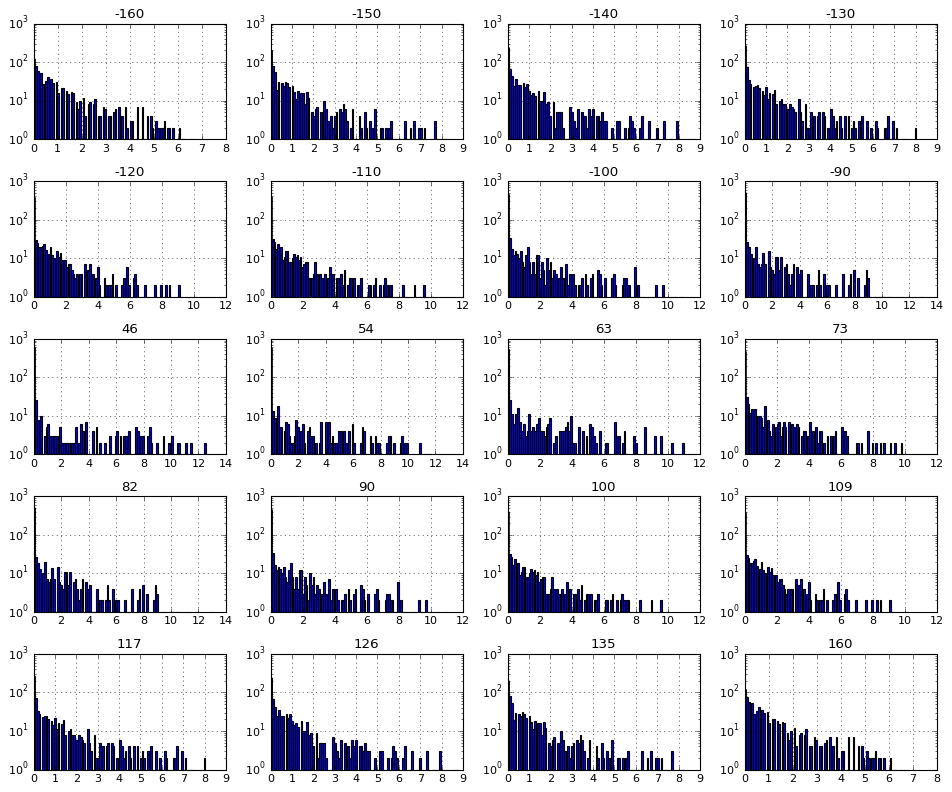

In [183]:
data.hist(figsize=(12,10),bins=100,log=True)
tight_layout()
show()